In [1]:
import pandas as pd

In [3]:
# Data dictionary with internship application details
data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'Domain': ['Data Science', 'Web Development', 'AI/ML', 'Cybersecurity', 'Data Science',
               'Web Development', 'AI/ML', 'Data Science', 'Cybersecurity', 'Data Science',
               'AI/ML', 'Data Science', 'Web Development', 'Cybersecurity', 'Data Science',
               'AI/ML', 'Web Development', 'Data Science', 'AI/ML', 'Cybersecurity'],
    'ApplicationStatus': ['Applied']*20,
    'ParticipationStatus': ['Participated', 'Not Participated', 'Participated', 'Participated', 'Not Participated',
                            'Participated', 'Participated', 'Participated', 'Not Participated', 'Participated',
                            'Participated', 'Participated', 'Not Participated', 'Participated', 'Participated',
                            'Not Participated', 'Participated', 'Participated', 'Participated', 'Not Participated']
}


In [5]:
# Create DataFrame
df = pd.DataFrame(data)

In [7]:
# Save DataFrame as CSV file
df.to_csv('internship_data.csv', index=False)

In [9]:
print("CSV file 'internship_data.csv' created successfully.")

CSV file 'internship_data.csv' created successfully.


In [21]:
# Internship Project: Analysis of User Engagement Across Internship Domains at MITS
# Description:
# This project analyzes student engagement in various internship domains by collecting
# application and participation data. It helps identify the most popular and emerging
# internship fields at MITS using Python for data analysis and visualization.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Set Seaborn style for better visuals
sns.set_style('darkgrid')

In [25]:
# Step 1: Load your CSV data
# Ensure 'internship_data.csv' is in the same folder as this notebook
print("\nLoading data...")
df = pd.read_csv('internship_data.csv')
print("\nData preview:")
print(df.head())


Loading data...

Data preview:
   StudentID           Domain ApplicationStatus ParticipationStatus
0          1     Data Science           Applied        Participated
1          2  Web Development           Applied    Not Participated
2          3            AI/ML           Applied        Participated
3          4    Cybersecurity           Applied        Participated
4          5     Data Science           Applied    Not Participated


In [27]:
# Step 2: Analyze data - number of applications per domain
applications = df.groupby('Domain').size().reset_index(name='Applications')

In [29]:
# Step 3: Analyze participations per domain
participations = df[df['ParticipationStatus'] == 'Participated'] \
                  .groupby('Domain').size().reset_index(name='Participations')

In [31]:
# Step 4: Merge and calculate participation rate
summary = pd.merge(applications, participations, on='Domain', how='left').fillna(0)
summary['ParticipationRate'] = summary['Participations'] / summary['Applications']

print("\nSummary table:")
print(summary)


Summary table:
            Domain  Applications  Participations  ParticipationRate
0            AI/ML             5               4           0.800000
1    Cybersecurity             4               2           0.500000
2     Data Science             7               6           0.857143
3  Web Development             4               2           0.500000


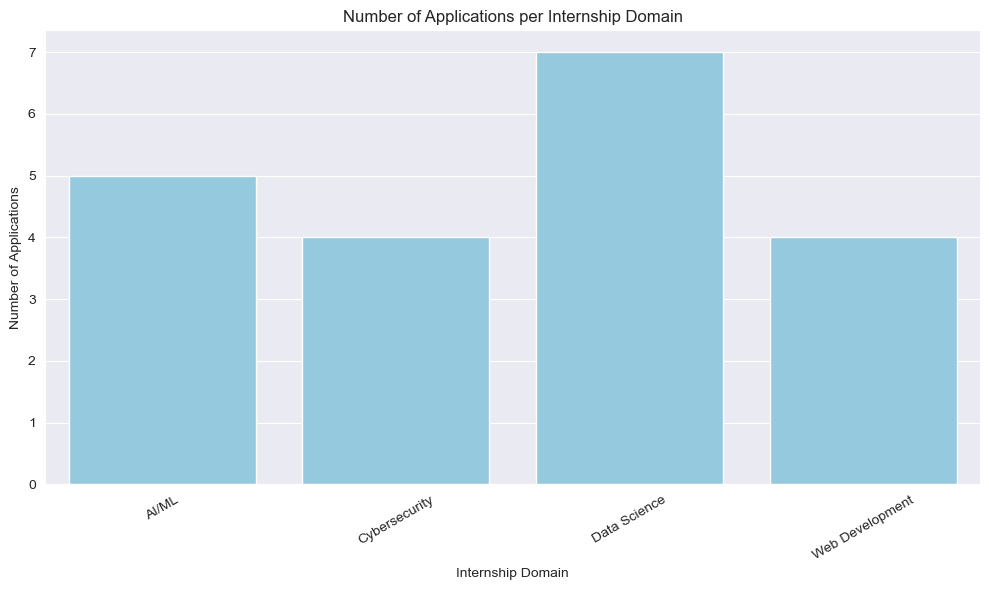

In [35]:
# Bar plot - Applications per domain
plt.figure(figsize=(10,6))
sns.barplot(data=summary, x='Domain', y='Applications', color='skyblue')
plt.title('Number of Applications per Internship Domain')
plt.ylabel('Number of Applications')
plt.xlabel('Internship Domain')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

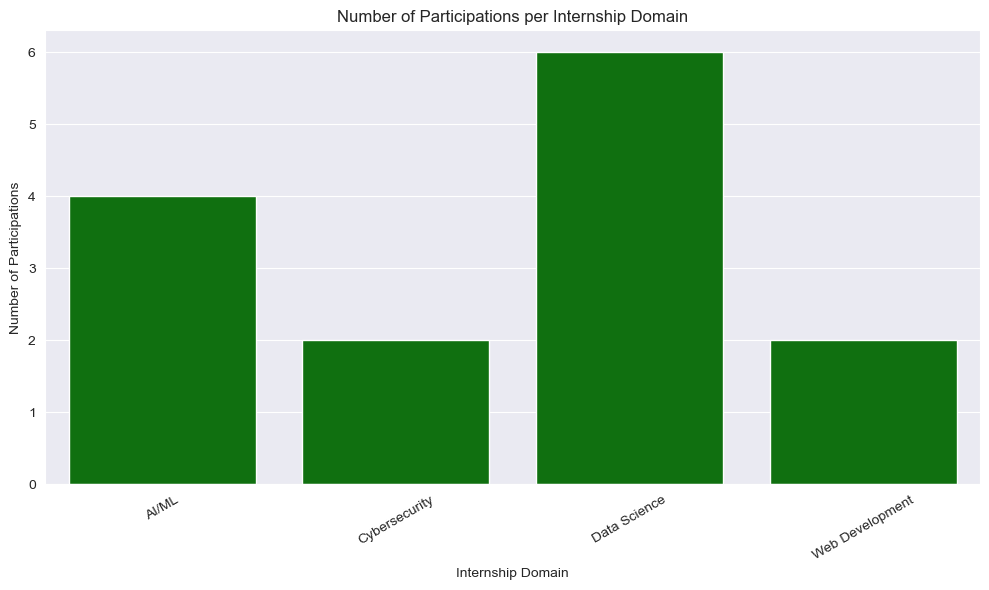

In [39]:
# Bar plot - Participations per domain
plt.figure(figsize=(10,6))
sns.barplot(data=summary, x='Domain', y='Participations', color='green')
plt.title('Number of Participations per Internship Domain')
plt.ylabel('Number of Participations')
plt.xlabel('Internship Domain')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

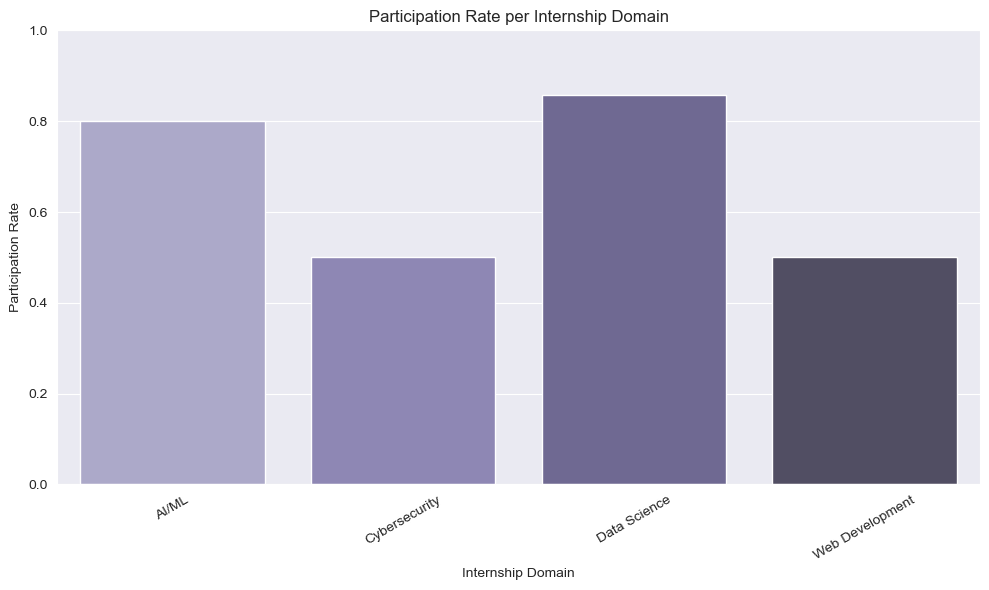

In [43]:
# Bar plot - Participation rate per domain
plt.figure(figsize=(10,6))
sns.barplot(data=summary, x='Domain', y='ParticipationRate', hue='Domain', palette='Purples_d', dodge=False, legend=False)
plt.title('Participation Rate per Internship Domain')
plt.ylabel('Participation Rate')
plt.xlabel('Internship Domain')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

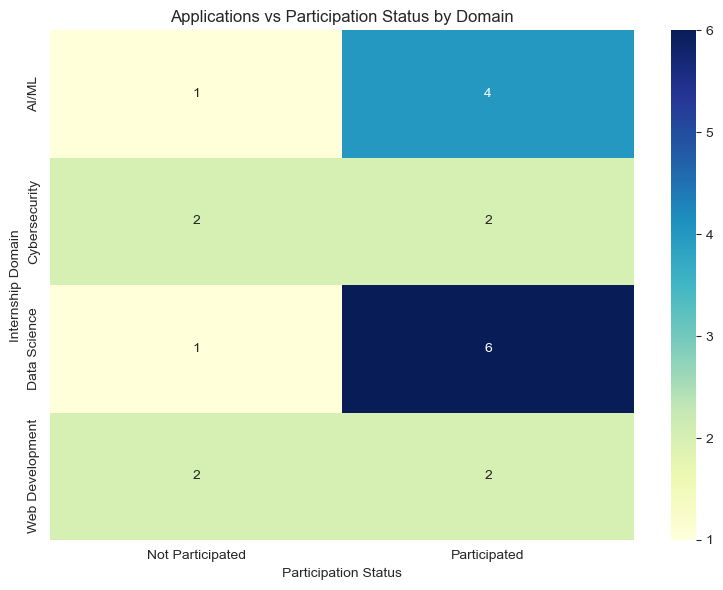


Conclusion:
- The charts show which domains have the most applications and participations.
- Participation Rate helps identify domains with high or low actual engagement.
- This helps MITS focus future internship efforts on domains with high student interest and participation.



In [45]:
# Heatmap: Application vs Participation status by domain
heatmap_data = pd.crosstab(df['Domain'], df['ParticipationStatus'])

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Applications vs Participation Status by Domain')
plt.ylabel('Internship Domain')
plt.xlabel('Participation Status')
plt.tight_layout()
plt.show()

# Conclusion
print("""
Conclusion:
- The charts show which domains have the most applications and participations.
- Participation Rate helps identify domains with high or low actual engagement.
- This helps MITS focus future internship efforts on domains with high student interest and participation.
""")